# Fordgobike-tripdata

## by Ramya Ramachandra




## Data Wrangling


This data set contains information about rides made in bike-sharing system.

In [63]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
trip_data=pd.read_csv('201902-fordgobike-tripdata.csv')
trip_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [65]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [66]:
trip_data.shape

(183412, 16)

In [67]:
trip_data.describe() 

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [68]:
trip_data.duplicated().sum()

0

In [69]:
trip_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [70]:
print(trip_data['start_time'].head())

0    2019-02-28 17:32:10.1450
1    2019-02-28 18:53:21.7890
2    2019-02-28 12:13:13.2180
3    2019-02-28 17:54:26.0100
4    2019-02-28 23:54:18.5490
Name: start_time, dtype: object


There are missing data found in columns start and end station_id and station_name, there is also missing data in member_birth_year and member_gender.

In [71]:
#convert the datatype 
trip_data['start_time'] = pd.to_datetime(trip_data['start_time'])
trip_data['end_time'] = pd.to_datetime(trip_data['start_time'])

In [72]:
trip_data['start_station_id'] = trip_data['start_station_id'].astype(str)
trip_data['end_station_id'] = trip_data['end_station_id'].astype(str)

In [73]:
trip_data['member_birth_year'] = trip_data['member_birth_year'].fillna(0).astype('Int64')
#(taken help to fix the value error:Cannot convert non-finite values (NA or inf) to integer)
#https://stackoverflow.com/questions/48511484/data-type-conversion-error-valueerror-cannot-convert-non-finite-values-na-or

In [74]:
#dropping the missing values
trip_data.dropna(subset=['start_station_id', 'end_station_id', 'start_station_name', 'end_station_name', 'member_birth_year', 'member_gender'], inplace=True)

In [75]:
trip_data.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [76]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(7)
memory usage:

In [77]:
trip_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-02-28 17:32:10.145,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-02-28 12:13:13.218,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-02-28 17:54:26.010,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-02-28 23:54:18.549,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-02-28 23:49:58.632,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


### What is the main features of interest in your dataset?
* To provide insights into the average trip length, identify outliers and help understand the usage patterns of the bike-sharing system.
* Use start_time and end_time for analyzing patterns based on time of day, day of the week, or month of the year, and understand the peak usage periods.
* Identify frequently used routes, users, age distribution, and gender breakdown.

### What features in the dataset do you think will help support your investigation into your features of interest?
We can explore various aspects of the bike-sharing system, such as trip duration, station popularity, and user behavior.
Investing in these combinations and relationships will support our investigation and provide insights and characteristics of the FordGoBike system.

## Univariate Exploration

In this section, we analyze and visualize individual variables in the dataset.

In [78]:
#copy original dataframe to df
df=trip_data.copy()

In [79]:
#most popular start stations
start_station = df['start_station_name'].value_counts()
start_station.head(10)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

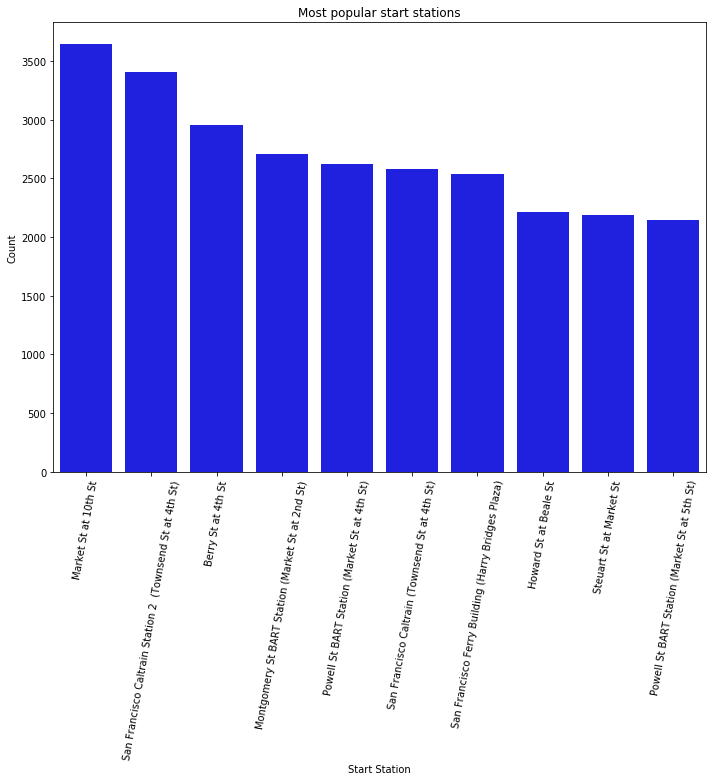

In [108]:
start_station = df['start_station_name'].value_counts().head(10)

plt.figure(figsize=[ 11.69, 8.27])
sns.barplot(x=start_station.index, y=start_station.values, color='blue')
plt.xlabel('Start Station')
plt.ylabel('Count')
plt.title("Most popular start stations")
plt.xticks(rotation=80)
plt.show();

The most popular start_staion is Market St at 10th St.

In [81]:
#Popular end stations
end_station = df['end_station_name'].value_counts()
end_station.head(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2153
Name: end_station_name, dtype: int64

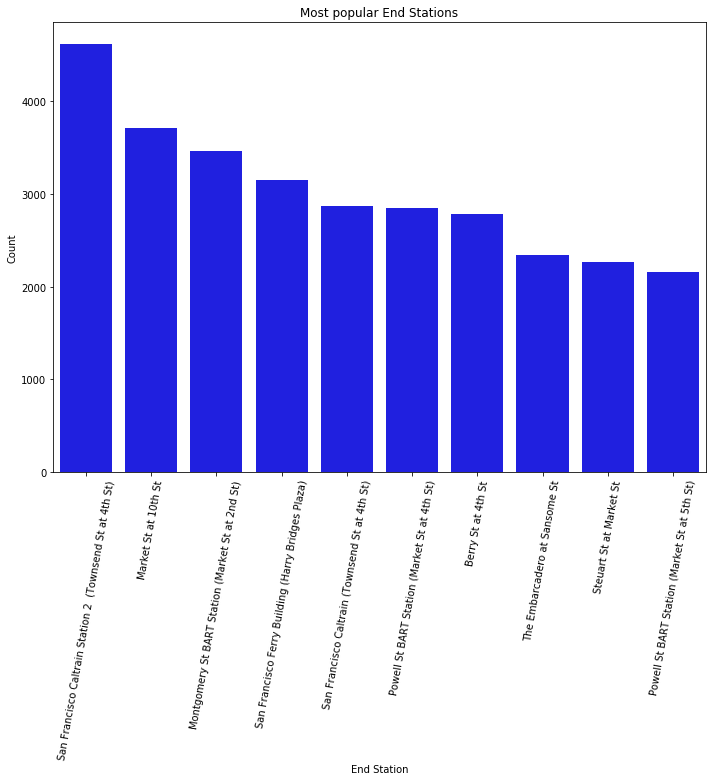

In [82]:
end_station = df['end_station_name'].value_counts().head(10)

plt.figure(figsize=[ 11.69, 8.27])
sns.barplot(x=end_station.index, y=end_station.values, color='blue')
plt.xlabel('End Station')
plt.ylabel('Count')
plt.title("Most popular End Stations")
plt.xticks(rotation=80)
plt.show();

The Most Popular End Station is San Francisco Caltrain Station 2  (Townsend St at 4th St).

In [83]:
df['member_birth_year'].head(5)

0    1984
2    1972
3    1989
4    1974
5    1959
Name: member_birth_year, dtype: int64

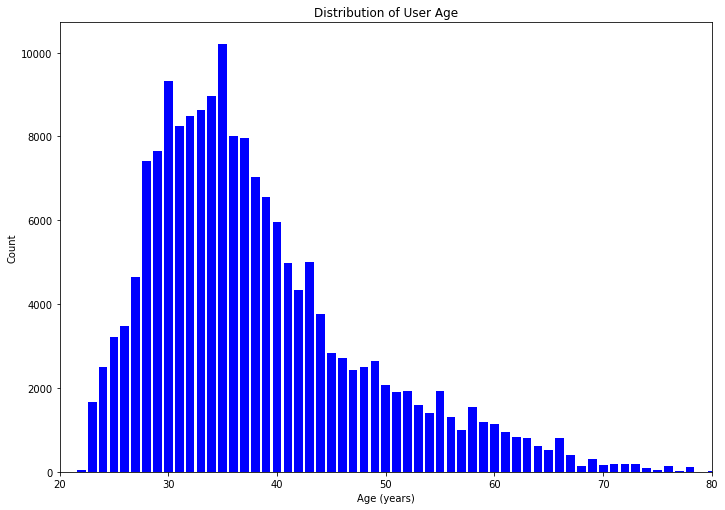

In [84]:
plt.figure(figsize=[ 11.69, 8.27])
age = (2023 - df['member_birth_year']).value_counts().sort_index()
plt.bar(age.index, age.values, color='blue')
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.xlim([20, 80])
plt.ylabel('Count')
plt.show()

We observe that there is a high number of trips for individuals in their late 20's to late 30's has the higher values on the graph.

In [85]:
#let's check the gender breakdown
gender_counts = df['member_gender'].value_counts()
gender_counts

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

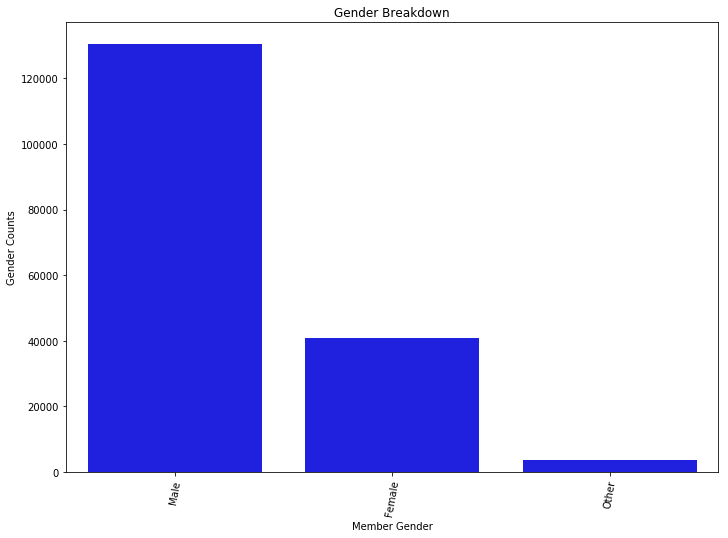

In [86]:
plt.figure(figsize=[ 11.69, 8.27])
sns.barplot(x=gender_counts.index, y=gender_counts.values, color='blue')
plt.title("Gender Breakdown")
plt.xlabel('Member Gender')
plt.ylabel('Gender Counts')
plt.xticks(rotation=80)
plt.show();


We see that males have higher trip count compared to females and others.

In [87]:
#trip duration
df['trip_duration'] = df['duration_sec'] 
df['trip_duration'].head()


0    52185
2    61854
3    36490
4     1585
5     1793
Name: trip_duration, dtype: int64

In [88]:
df['trip_duration'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: trip_duration, dtype: float64

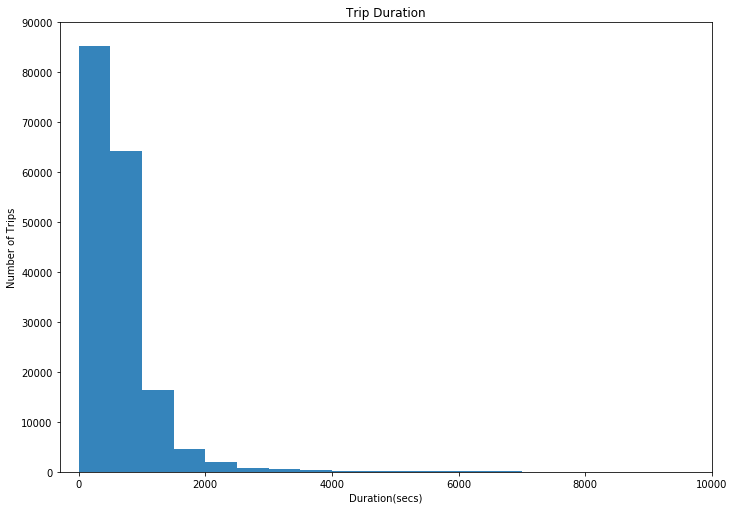

In [89]:
binsize= 500
bins = np.arange(0, df['trip_duration'].max() + binsize + 1, binsize)

plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=df, x='trip_duration', bins=bins, alpha=0.9)
plt.title('Trip Duration')
plt.xlabel('Duration(secs)')
plt.ylabel('Number of Trips')
plt.xlim([-300, 10000])
plt.ylim([0, 90000])
plt.show()

The trip duration distribution is biased to the right, showing a higher frequency of shorter excursions.

In [90]:
#type of user
user = df['user_type'].value_counts()
user

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

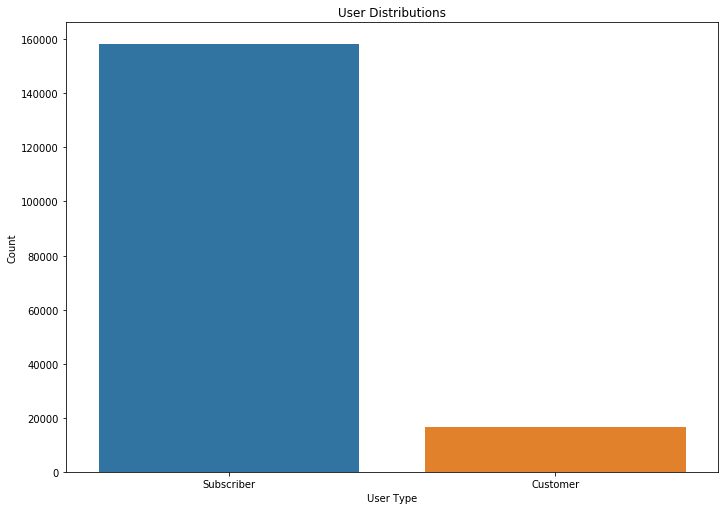

In [91]:
plt.figure(figsize=[ 11.69, 8.27])
sns.barplot(x=user.index, y=user.values)
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('User Distributions')
plt.show()

Subscribers have high frequency of trips compared to Customers.

In [92]:
#Number of trips per day of week

df['day_ofweek'] = df['start_time'].dt.day_name()
trips = df['day_ofweek'].value_counts().sort_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips


Friday       27663
Monday       25641
Saturday     14414
Sunday       14512
Thursday     33712
Tuesday      30584
Wednesday    28426
Name: day_ofweek, dtype: int64

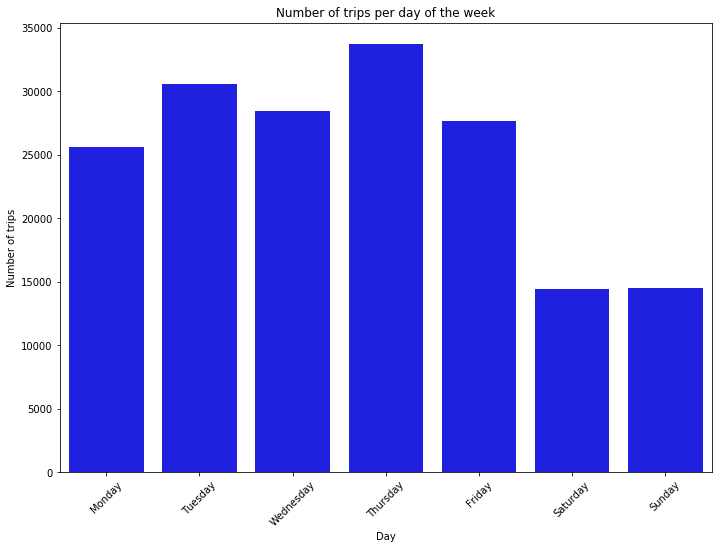

In [93]:
plt.figure(figsize=[ 11.69, 8.27])
sns.barplot(x=trips.index, y=trips.values, order=day_order, color='blue')
plt.xlabel('Day')
plt.ylabel('Number of trips')
plt.title('Number of trips per day of the week')
plt.xticks(rotation=45)
plt.show()

Thursday, Tuesday, and Friday have the most trips compared to other days.

In [94]:
### Distribution of bike share for all trips

trip_counts=df['bike_share_for_all_trip'].value_counts()
trip_counts

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

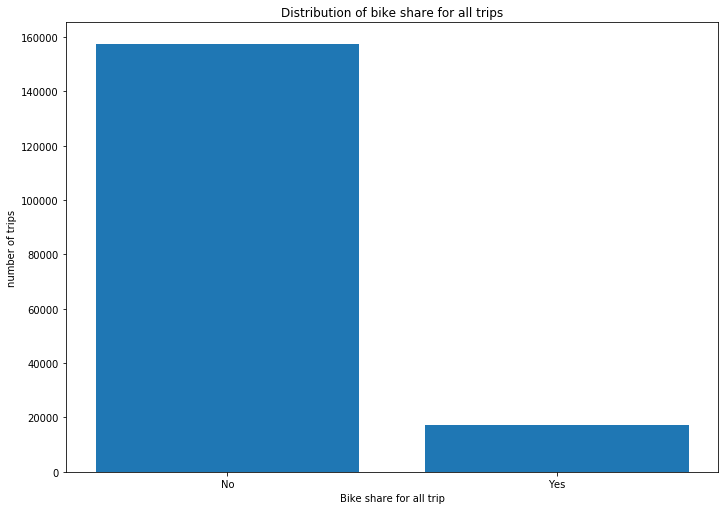

In [95]:
plt.figure(figsize=[ 11.69, 8.27])
plt.bar(trip_counts.index, trip_counts.values)
plt.xlabel('Bike share for all trip')
plt.ylabel('number of trips')
plt.title('Distribution of bike share for all trips')
plt.show()

This implies that, while the majority of trips did not use the bike-sharing program for all journeys, only a small number of trips did.

#### Observation 1:
1. The most popular start-stations is Market St at 10th St, San Francisco Caltrain Station 2 and  Berry St at 4th St, these stations have significantly higher trip counts compared to others.
2. The popular end-station is San Francisco Caltrain Station 2, Market St at 10th St. These align with the popular start-stations.
3. The majority of bike users are male with 76% of the total, and female around 24%.
4. The dataset consists of subscribers of 90% who use the bike-sharing service more frequently, and 10% of the users may be occasional or on-time users.
5. The data indicates that Thrusday has the highest number of trips, followed by Tuesday and Friday.Saturday and Sunday have relatively lower trip counts.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We have added a new column called 'trip_duration', to the dataframe 'df' by assigning the values from the 'duration_sec' column to it. This was done to have a separate column for trip duration, which is used for plotting.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> We have changed the datatypes for 'start_time', 'end_time' to pd.to_datetime() function. The datatype for 'start_station_id', 'end_station_id', are converted to string datatype astype() method.


## Bivariate Exploration

In Bivariate exploration 

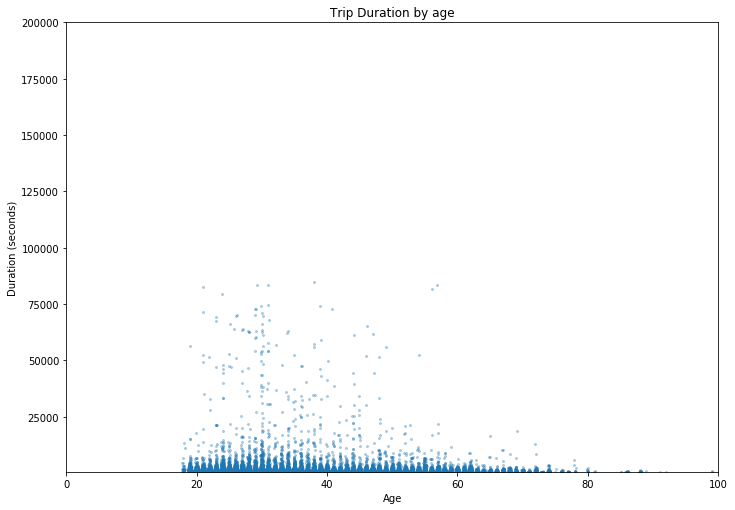

In [96]:
def plot_data(df, x_col, y_col, title, xlabel, ylabel, figure_size=(11.69, 8.27), axis_range=None, xlim=None, jitter_amount=0.1, alpha=0.3):
    plt.figure(figsize=figure_size)
    
    # Add jitter to the x and y values
    x_jitter = df[x_col] + np.random.normal(0, jitter_amount, len(df))
    y_jitter = df[y_col] + np.random.normal(0, jitter_amount, len(df))
    
    plt.scatter(x_jitter, y_jitter, alpha=alpha, s=4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if axis_range:
        plt.axis(axis_range)
    if xlim:
        plt.xlim(xlim)
    plt.show()
    
df['age'] = 2019 - df['member_birth_year']

plot_data(df, 
           'age', 
           'trip_duration',
            'Trip Duration by age',
             'Age',
            'Duration (seconds)',
            axis_range=[-10, 150, 500, 200000],
            xlim=[0, 100],
            jitter_amount=0.1,
            alpha=0.3)

The scatter plot shows that users aged between 20 and 60 has the wider range of trip durations and other having shorter durations.

In [97]:
correlation = df['trip_duration'].corr(df['member_birth_year'])
correlation

-0.0060411748752546577

The correlation coefficient between the 'trip_duration', and 'member_birth_year', is -0.00604117 indicating a weak negative correlation suggesting that there is no linear relationship between the two.

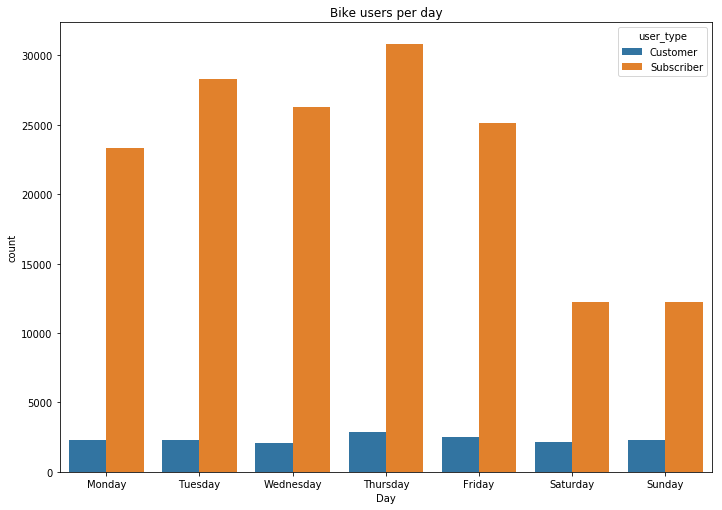

In [98]:
#Bike users by day
plt.figure(figsize=[ 11.69, 8.27])
sns.countplot(data=df, x='day_ofweek', hue='user_type', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Bike users per day')
plt.xlabel('Day')
plt.show()


The number of Subscribers is higher than the number of customers;  customers show a trend beginning on Thursday, rising on weekends, and dropping significantly on weekdays. This implies that customer types include infrequent riders. where subscribers are greater on Thursday, Tuesday, and Friday, suggesting that subscribers tend to use the bike service more frequently for their regular commutes.

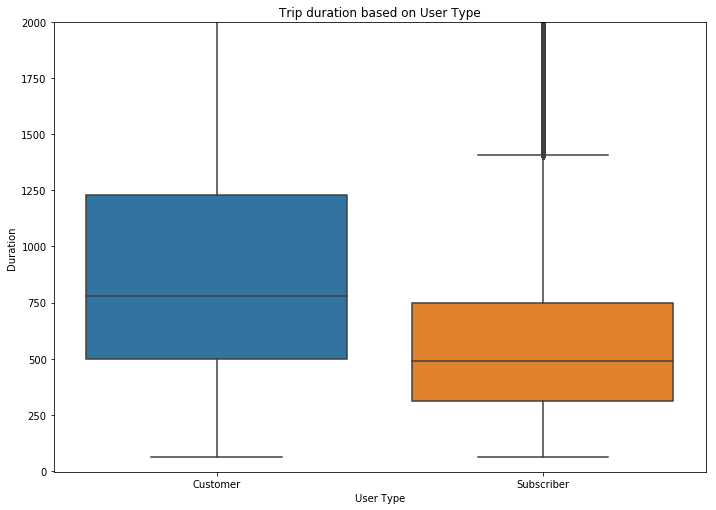

In [99]:
#user_type based on duration
plt.figure(figsize=[ 11.69, 8.27])
sns.boxplot(data=df, x='user_type', y='trip_duration')
plt.title('Trip duration based on User Type')
plt.ylim([-5, 2000])
plt.xlabel('User Type')
plt.ylabel('Duration')
plt.show()

The duration of trips is higher  for customers compared to Subscriber, indicating customers taking longer trips.

In [100]:
y=df.groupby(['bike_share_for_all_trip', 'user_type']).size()
y

bike_share_for_all_trip  user_type 
No                       Customer       16566
                         Subscriber    141040
Yes                      Subscriber     17346
dtype: int64

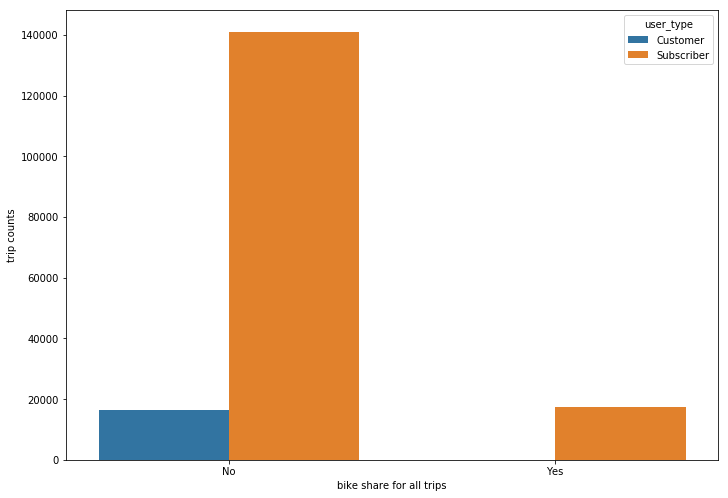

In [101]:
#compare user types for bike share for all trip
#trip_counts=df['bike_share_for_all_trip'].value_counts()

plt.figure(figsize=[ 11.69, 8.27])
sns.countplot(data=df, x='bike_share_for_all_trip', hue='user_type')
plt.xlabel('bike share for all trips')
plt.ylabel('trip counts')
plt.show()

Customers who did not participate in the bike_share_for_all_trip made 16566 journeys, whereas subscribers who did not participate made 141040 trips. Subscribers who participated in the program made 17346 trips.


The boxplot analysis reveals that the trip duration of customers is longer than the Subscribers. 

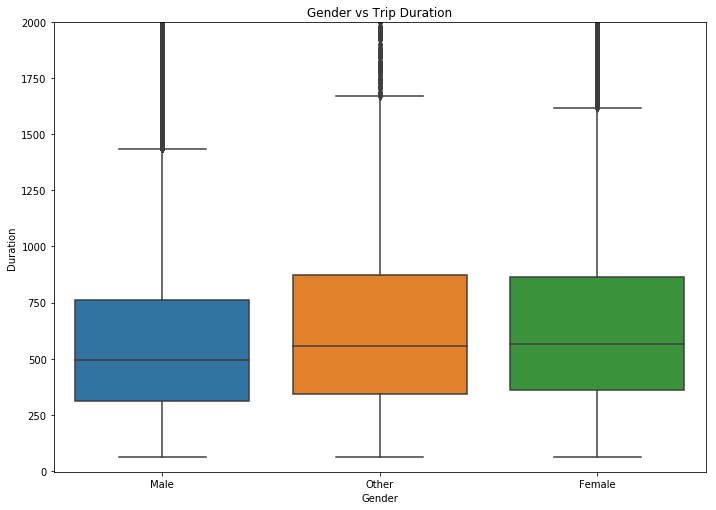

In [102]:
#Dependency of gender and trip duration
plt.figure(figsize=[ 11.69, 8.27])
sns.boxplot(data=df, x='member_gender', y='trip_duration')
plt.title('Gender vs Trip Duration')
plt.xlabel('Gender')
plt.ylabel('Duration')
plt.ylim([-5, 2000])
plt.show()

We see that male riders are very high than Other and Female but we can also see that percentage of Female and Other riders have longer trips than males.

## Multivariate Exploration

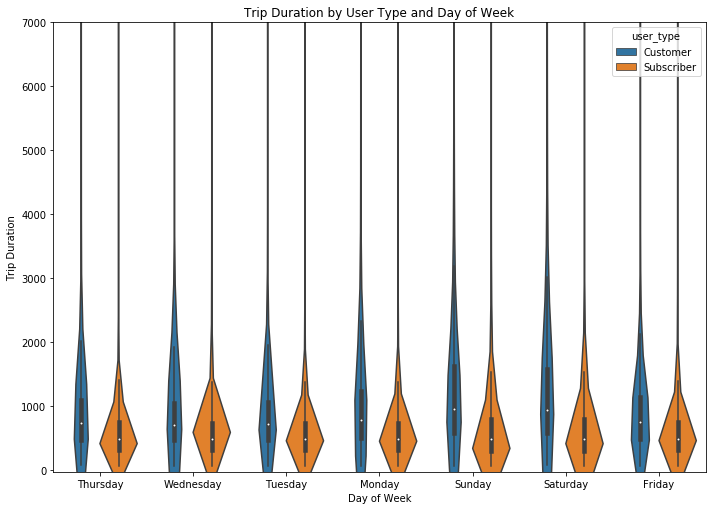

In [103]:
# Trip duration using User Type and Day of Week

plt.figure(figsize=[ 11.69, 8.27])
sns.violinplot(x="day_ofweek", y="trip_duration", hue="user_type",  data=df)
plt.xlabel("Day of Week")
plt.ylabel("Trip Duration")
plt.title("Trip Duration by User Type and Day of Week")
plt.ylim([-25, 7000])
plt.show()

We see that the Subscriber user type has more trips with duration less than 1000s, where as in Customers we see that  Saturday and Sundays the density is longer, indicating that more trips with longer durations on these days.

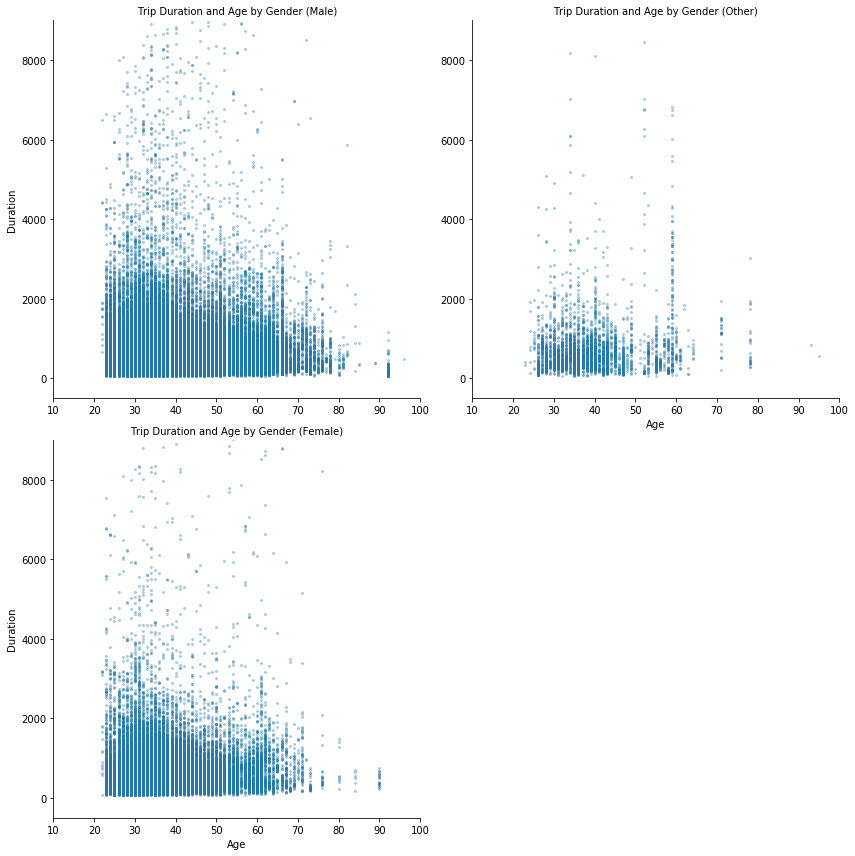

In [104]:
#Trip Duration and Age by gender.

df['age'] = 2023 - df['member_birth_year']

g=sns.FacetGrid(data=df, col='member_gender', col_wrap=2, size=6, xlim=[10, 100], ylim=[-500, 9000], despine=True,
                       sharex=False, sharey=False) # https://seaborn.pydata.org/generated/seaborn.despine.html
g.map(plt.scatter, 'age', 'trip_duration', alpha=0.3, s=4)
g.set_xlabels('Age')
g.set_ylabels('Duration')
g.set_titles('Trip Duration and Age by Gender ({col_name})')

plt.show()


The plot suggests a possible gender difference in journey patterns and usage behaviors.

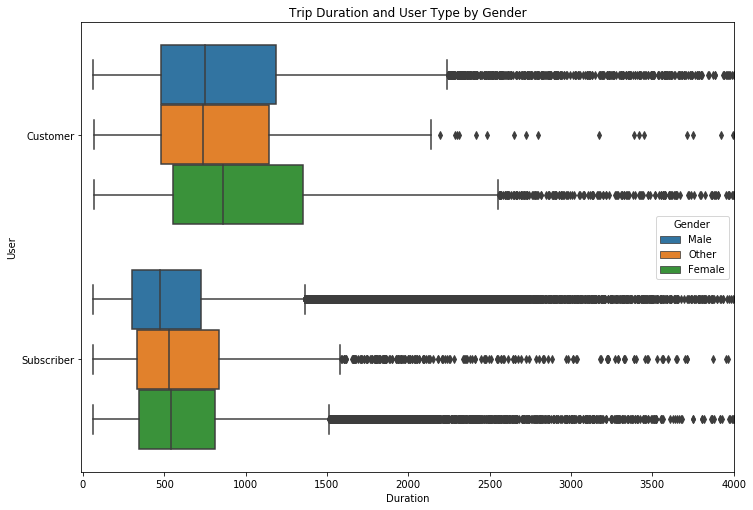

In [105]:
#Trip Duration and User Type by gender.

plt.figure(figsize=[ 11.69, 8.27])
sns.boxplot(x="trip_duration", y="user_type", data=df, hue="member_gender")
plt.xlabel('Duration')
plt.ylabel('User')
plt.title('Trip Duration and User Type by Gender')
plt.legend(title='Gender')
plt.xlim([-10, 4000])
plt.show()

This analysis indicates the differences in trip duration between user types and genders, with Subscribers having shorter trips than Customers, with some variability identified within gender groupings.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The box plot showed that the trip duration for Customers tended to be higher than for Subscribers, this suggests that customers take longer trips compared to Subscribers.

> The scatter plot between trip duration and age showed a negative correlation, which means that as the age increased the trip duration slightly decreased. Correlation is not very strong.

### Were there any interesting or surprising interactions between features?

> The countplot of bike users per day showed that the distributions of Subscribers and Customers varied across different days of the week. Subscribers were more prevalent on weekdays,and Customer had higher counts on weekends. 

>There were differences based on gender when analyzing the relationship between trip duration, age, and gender in box plot analyses where there was no clear correlation between trip duration and age. The box plot revealed that the upper quartile of trip time was somewhat greater for females than males, showing a gender-related interaction with trip duration.

In [106]:
#Export cleaned Dataframe to CSV file for Slide deck.
df.to_csv('data_cleaned.csv', index=False)
df_clean = pd.read_csv('data_cleaned.csv')

In [107]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration,day_ofweek,age
0,52185,2019-02-28 17:32:10.145,2019-02-28 17:32:10.145,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,52185,Thursday,39
1,61854,2019-02-28 12:13:13.218,2019-02-28 12:13:13.218,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,61854,Thursday,51
2,36490,2019-02-28 17:54:26.010,2019-02-28 17:54:26.010,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,36490,Thursday,34
3,1585,2019-02-28 23:54:18.549,2019-02-28 23:54:18.549,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,1585,Thursday,49
4,1793,2019-02-28 23:49:58.632,2019-02-28 23:49:58.632,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,1793,Thursday,64
